In [2]:
import sys
# sys.path.insert(0,'../prada_bayes_opt/')
sys.path.insert(0,'../')

from prada_bayes_opt import PradaBayOptBatch
from prada_bayes_opt import functions
from prada_bayes_opt import auxiliary_functions
import numpy as np
import matplotlib.pyplot as plt
from auxiliary_functions import *
from prada_bayes_opt import *
import visualization

import ppo_functions as pfunctions
import real_experiment_function

import random
import warnings
warnings.filterwarnings("ignore")

random.seed('6789')

# saveGraphPath = ('./graphs/')

# plt.savefig('books_read.png')

In [3]:
# please select one of the functions / exepriments below

#myfunction=functions.forrester()       #1D
# myfunction=functions.branin()          #2D
#myfunction=functions.dropwave()        #2D

# myfunction=functions.hartman_3d()      #3D

# myfunction=real_experiment_function.SVR_function()      #4D Real Experiment with SVR

#myfunction=functions.gSobol(a=np.array([1,1,1,1,1]))       #5D
#myfunction=functions.alpine2(input_dim=5)                   #5D

#myfunction=functions.hartman_6d()                          #6D

# myfunction=real_experiment_function.DeepLearning_MLP_MNIST()       #7D Real Experiment with SV

#myfunction=functions.gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1]))     #10D
#myfunction=functions.alpine2(input_dim=10)                         #10D

myfunction = pfunctions.PpoImport()

In [4]:
print ("=======================================================================")
print ("You are selecting function {:s} D={:d}".format(myfunction.name, myfunction.input_dim))

# if myfunction.input_dim<=2:    
#     visualization.plot_original_function(myfunction)

# create an empty object for BO
bo=PradaBayOptBatch(f=myfunction.func, pbounds=myfunction.bounds, acq='ucb',opt='scipy')

# parameter for Gaussian Process
gp_params = {'theta':0.1*bo.dim,'noise_delta':0.1}


You are selecting function ppoGAE_import8 D=2


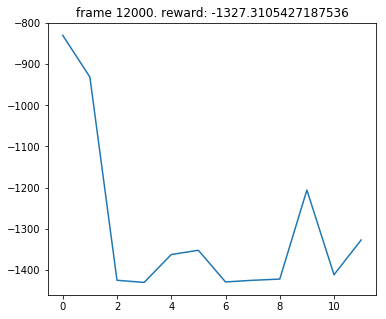

rewards:  -1327.3105427187536
func_re:  [-0.4072321355342865, -0.035539183765649796, 0.02403959259390831, 0.1498226821422577, 0.4244193136692047, -0.04661371931433678]
#Batch=6 f_max=0.4244


In [5]:
# init Bayesian Optimization
print ("=======================================================================")
print ("Start Initialization")
bo.init(n_init_points=3*bo.dim)

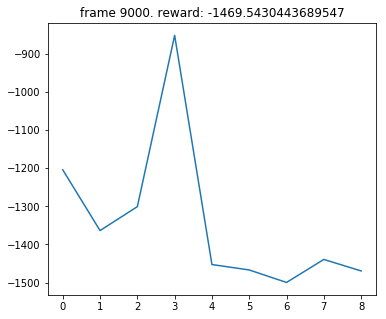

rewards:  -1469.5430443689547


In [ ]:
print ("=======================================================================")
print ("\nRunning Budgeted Batch Bayesian Optimization")


# number of iteration
TT=5*myfunction.input_dim
print ("TT: ", TT)
for index in range(0,TT):
    print ("index: ", index)
    bo.maximize_batch_B3O(gp_params,kappa=2,IsPlot=1)
    sys.stdout.write("\nIter={:d} Optimization Time={:.2f} sec ".format(index,bo.opt_time[index]))



In [ ]:
print ("=======================================================================")
print ("\nB3O #TotalPoints={:.0f} Best-found-value={:.3f}".format(np.sum(bo.NumPoints),bo.Y.max()))
idxMax=np.argmax(bo.Y)
print ("X_optimal ")
print (bo.X_original[idxMax])


NumPoints = np.asarray(bo.NumPoints, dtype = 'int')

# plot the best-found-value
# my_yBest=auxiliary_functions.yBest_Iteration(bo.Y,bo.NumPoints,IsPradaBO=1)
my_yBest=auxiliary_functions.yBest_Iteration(bo.Y,NumPoints,IsPradaBO=1)

plt.plot(range(0,TT+1),my_yBest,linewidth=2,color='r',linestyle='-', marker='s',label='B3O')

plt.ylabel('Best-found-value',fontdict={'size':18})
plt.xlabel('Iteration',fontdict={'size':18})
plt.legend(loc=1,prop={'size':18})
#plt.ylim([np.min(my_yBest)*0.7,np.max(my_yBest)*1.2])
strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
plt.title(strTitle,fontdict={'size':20})

# plot the batch size per iteration
fig=plt.figure(figsize=(9, 4.5))
strNTotal="B3O (N={:.0f})".format(np.sum(bo.NumPoints))
plt.plot(range(1,TT+1),bo.NumPoints[1:],linewidth=2,color='r',linestyle='-',marker='s', label=strNTotal)
plt.ylabel('# BatchSize per Iter',fontdict={'size':18})
plt.xlabel('Iteration',fontdict={'size':18})
plt.legend(loc=1,prop={'size':18})
plt.ylim([np.min(bo.NumPoints[1:])-1,np.max(bo.NumPoints[1:])+1])
plt.title(strTitle,fontdict={'size':20})

In [17]:
# my_yBest=auxiliary_functions.yBest_Iteration(bo.Y,bo.NumPoints,IsPradaBO=1)

print (bo.Y)
print (bo.NumPoints)

NumPoints = np.asarray(bo.NumPoints, dtype = 'int')
print (NumPoints)

[ 7.70788491e-01  5.79552241e-02  2.16240747e+03  1.44009832e-02
  1.55906277e-02 -9.66106076e-04  5.05591393e-01  1.15794449e+01
  5.42355597e-01  9.46681976e-01  9.98296976e-01  3.06664133e+00
 -9.95224044e-02  3.56024683e-01  2.95602381e-01 -2.43215486e-01
  1.36123610e+00  1.99122822e+00 -8.80688801e-02  8.10884535e-01
  3.44083220e-01  2.61728096e+00  7.60095660e-03  1.37378799e+02
 -1.33695174e-02  3.50761674e-02]
[6. 2. 2. 2. 2. 2. 3. 2. 1. 2. 2.]
[6 2 2 2 2 2 3 2 1 2 2]
